# First Practical Work

## Data Science and Engineering

### DESIGN OF AN IMAGE FILTER FUNCTION, PARALLELIZABLE AND SCALABLE

**Full name:** Matteo Silla

**Partner:** Maxwell Calman
    
**NIA** :100491846

In [153]:
import numpy as np
import multiprocessing as mp
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cProfile

In [154]:
F_IMAGE1="chess.jpg" #<DEFINE HERE WHICH IMAGE YOU WANTS TO LOAD
F_IMAGE2="digits.jpg" #<DEFINE HERE WHICH IMAGE YOU WANTS TO LOAD

In [155]:
image1= np.array(Image.open(F_IMAGE1))
image2= np.array(Image.open(F_IMAGE2))
# IN PART 2 WE WORK ON A SINGLE IMAGE SO WE WANT ALL VECTORS TO BE SIZED JUST ACCORDING TO IMAGE 1
#image2 = image1

In [156]:
filter1=np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])
filter2=np.array([[0.5, 0 , -0.5]]) 
filter3=np.array([[0.5],[0],[-0.5]])

filter4=np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

filter5=np.array([
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.01330373,0.11098164,0.22508352,0.11098164,0.01330373],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633]
])

In [157]:
NUMPROCESS=4

In [158]:
print(image2.shape)

(375, 500, 3)


In [159]:
data_buffer_size1=image1.shape[0]*image1.shape[1]*image1.shape[2]
data_buffer_size2=image2.shape[0]*image2.shape[1]*image2.shape[2]
filtered_image1_VECTOR=mp.Array('b',data_buffer_size1)#HERE YOU HAVE TO DEFINE THE MULTIPROCESSING VECTOR FOR IMAGE1
filtered_image2_VECTOR=mp.Array('b',data_buffer_size2)#HERE YOU HAVE TO DEFINE THE MULTIPROCESSING VECTOR FOR IMAGE2

In [160]:
def tonumpyarray(mp_arr):
    #mp_array is a shared memory array with lock
    
    return np.frombuffer(mp_arr.get_obj(),dtype=np.uint8)

# AFTER THIS CELL YOU HAVE TO WRITE YOUR CODE

After this cell you have to use the preloaded image defined in the F_IMAGE variable, select two of the 5 filter predefined, and using the NUMPROCESS processors, apply the filters to the image and check results.

* The first filter is impulse response filter (the image output must be equals to the original one).
* The second filter is an edge filter, first order in x axis,  
* The third filter is an edge filter, first order in y axis,
* the fourth filter is an edge filter, second order, bi-directional
* the fifth filter is a blur gausian filter.

In [161]:
#YOUR CODE MUST BE START HERE
import importlib
import myfunctions as my

In [162]:
importlib.reload(my)

<module 'myfunctions' from '/Users/matteo/Desktop/erasmus/massive computing/massive-computing-p1/myfunctions.py'>

In [163]:
# Tests for one filter at a time
def filter(image,filter,filtered_image_VECTOR): 
    my.image_filter(image=image, filter_mask=filter, numprocessors=NUMPROCESS, filtered_image=filtered_image_VECTOR)

In [164]:
filter(image1,filter2,filtered_image1_VECTOR)


In [165]:
#profiling the filter
#cProfile.run("filter(image1,filter4,filtered_image1_VECTOR)")

In [166]:
filter(image2,filter4,filtered_image2_VECTOR)


In [167]:
# Invoke both in parellel
#my.filters_execution(image=image1, filter_mask1=filter1, filter_mask2=filter2, numprocessors=NUMPROCESS, filtered_image1=filtered_image1_VECTOR, filtered_image2=filtered_image2_VECTOR)

In [168]:
#YOUR CODE MUST END HERE

# Visualization
In this last cells we take the filtered images stored in the multiprocessing.Vector variables filtered_image1_VECTOR and filtered_image2_VECTOR, converts to numpy array, with the same shape of the orginal images, and show the results.

In [169]:
filtered_image1=tonumpyarray(filtered_image1_VECTOR).reshape(image1.shape)
filtered_image2=tonumpyarray(filtered_image2_VECTOR).reshape(image2.shape)

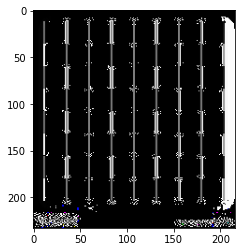

In [170]:
plt.figure()
plt.imshow(filtered_image1)

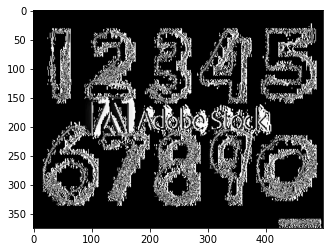

In [171]:
plt.figure()
plt.imshow(filtered_image2)

# ANALYSIS  

## SPEED OF MULTIPROCESSING VS SINGLE PROCESSOR
  If we try to compare the execution times of the image filtering function done with NUMPROCESS=4(multiprocessing) and NUMPROCESS=1 we have different result based on the image:

  * image: chess.jpg(filter 4), shape=(233, 216, 3):
    - NUMPROCESS=4: 2.4s
    - NUMPROCESS=1: 2.5s

  * image: fence.jpg(filter 4), shape=(623, 1024, 3):
    - NUMPROCESS=4: 8s
    - NUMPROCESS=1: 25s

  * image: cloudsonjupi.jpg(filter 4), shape=(480, 751, 3):
    - NUMPROCESS=4: 6.5s
    - NUMPROCESS=1: 15s

  We have done it using filter 4 that is a 3x3 matrix.

  You can notice that using multiprocessing really speeds up image filtering with images that have big shapes(e.g. fence.jpg,cloudsonjupi.jpg).

### PROFILING 
#### MULTIPROCESSING

  you can see above that Chess.jpg filtering execution time with one processor is almost the same as multiprocessing.

  So if we profile it with NUMPROCESS=4 we will notice that:
      
      ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    1.761    0.440    1.761    0.440 {method 'write' of '_io.BufferedWriter' objects}


  We can notice that on 2.5s of execution times the cores spend 1.8s in method 'write' of '_io.BufferedWriter' objects.
  
  The problem is that this method execution time remains costant also with other images, infact if we profile fence.jpg image:

      ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4      1.558    0.389    1.558    0.389 {method 'write' of '_io.BufferedWriter' objects}

  The time is almost the same as chess.jpg but the two images shapes are completely different, so where is the rest of the time is spent by the processors?
 
  if we go further in analysing chess.jpg we can notice that the processors spend the rest of the time in:

      ncalls  tottime  percall  cumtime  percall filename:lineno(function)
          75    0.585    0.008    0.585    0.008 {method 'acquire' of '_thread.lock' objects}

  
  this method indicates that the main process is waiting for IO and changes his time based on the image.
  
  profiling fence.jpg we got:
  
      ncalls  tottime  percall  cumtime  percall filename:lineno(function)
          75    6.842    0.091    6.842    0.091 {method 'acquire' of '_thread.lock' objects}

  We can notice that the number of calls of this method is the same as chess.jpg but with bigger images it spend more time waiting to acquire the lock because there is more computation to do for filtering the row as the row is bigger. 

  Now we can check with one single processor.

  #### SINGLE PROCESSOR

  analysing chess.jpg with NUMPROCESS=1 we can notice 2 thinghs:

      ncalls  tottime  percall  cumtime  percall filename:lineno(function)
          34    2.002    0.059    2.002    0.059 {method 'acquire' of '_thread.lock' objects}
           1    0.377    0.377    0.377    0.377 {method 'write' of '_io.BufferedWriter' objects}

  - method 'acquire' of '_thread.lock' objects is slower that the multiprocessing one: 0.585 total time , but the number of calls are fewer compared to the multiprocessing: 74 times, that's because is just one processor waiting for I/O, but it waits more time for acquiring the lock 0.059s percall time against 0.008s in multiprocessing.

  - method 'write' of '_io.BufferedWriter' objects is  faster compared to the multiprocessing 1.761 total time.

  in this case the total time of executions are similar, but if we check with fence.jpg in which execution times are really different we can notice that:

      ncalls  tottime  percall  cumtime  percall filename:lineno(function)
          34   24.544    0.722   24.544    0.722 {method 'acquire' of '_thread.lock' objects}
           1    0.426    0.426    0.426    0.426 {method 'write' of '_io.BufferedWriter' objects}

  - method 'acquire' of '_thread.lock' objects is slower that the multiprocessing one: 6.842s total time , but the number of calls are fewer compared to the multiprocessing: 74 times, that's because is just one processor waiting for I/O, but it waits more time for acquiring the lock 0.772 percall time against 0.091s in multiprocessing.
  
  - method 'write' of '_io.BufferedWriter' objects is  faster compared to the multiprocessing 1.561s total time.

  

  You can notice that method 'write' of '_io.BufferedWriter' time changes based on what the NUMPROCESS variable is set to, bigger is the value bigger will be this method time.

  Also you can notice that in big shape images the time waited for acquiring the lock becomes really high.
 # CONCLUSION

  So we can conclude that bigger is the shape of the image faster will be multiprocessing compared to single processor.
